<a href="https://colab.research.google.com/github/sebasDev2001/ProyectoFinal/blob/main/Modelos_de_Prediccion_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt #
import pandas as pd
from matplotlib.colors import ListedColormap #
from sklearn.model_selection import train_test_split #
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_moons, make_circles, make_classification,load_iris #
from sklearn.neighbors import KNeighborsClassifier #
from sklearn.svm import SVC #
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.base import clone


In [ ]:
tipos = ['KNN', 'SVC Linear', 'SVC Poly', 'SVC rbf', 'Bayes', 'Arbol de Desicion']

metodosClasificadores = [KNeighborsClassifier(3),
           SVC(kernel="linear", C=0.025),
           SVC(kernel="poly", degree=2),
           SVC(gamma=2, C=1),
           GaussianNB(),
           DecisionTreeClassifier(max_depth=5)]



In [ ]:
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)


In [ ]:
X += 2*rng.uniform(size=X.shape)
separacion_lineal = (X,y)

datasets= [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            separacion_lineal
            ]

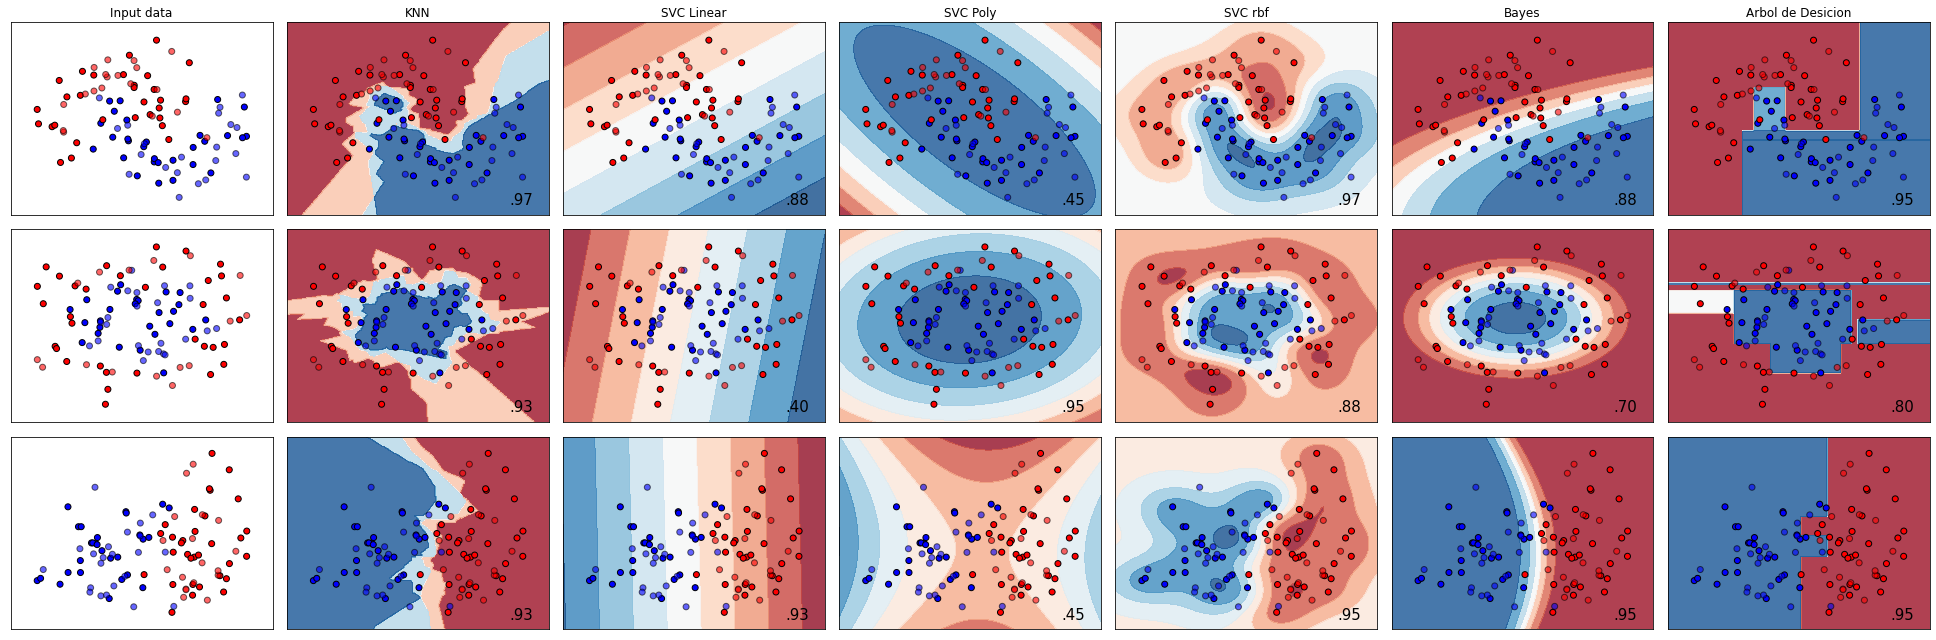

In [ ]:
h = 0.02
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(metodosClasificadores) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(tipos, metodosClasificadores):
        ax = plt.subplot(len(datasets), len(metodosClasificadores) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**Pasar los datos a numeros para los modelos**

In [ ]:
#pasar los datos a numeros para uso de los modelos
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
X = df.drop('class', axis=1)
y = df['class']
RS = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# para KNN
param_grid = {'n_neighbors':np.arange(1,20)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

print(knn_cv.best_score_,knn_cv.best_params_)

0.957550942504499 {'n_neighbors': 2}


In [ ]:
# para Arbol de Desicion

param_grid = {'max_depth': np.arange(1,10)}

AD = DecisionTreeClassifier()
AD_cv = GridSearchCV(AD,param_grid,cv=10)
AD_cv.fit(X,y)

print(AD_cv.best_score_,AD_cv.best_params_)

0.956689025018329 {'max_depth': 9}


In [ ]:
#SVC(kernel="linear", C=0.025),#SVC(kernel="poly"),#SVC(C=1),

param_grid = {'degree': np.arange(1,5)}
param_grid2 = {'C': np.arange(1,10)}

svc_poly = SVC(kernel="poly")
svc_poly_cv = GridSearchCV(svc_poly, param_grid, cv=10)
svc_poly_cv.fit(X,y)

print(svc_poly_cv.best_score_,svc_poly_cv.best_params_)

svc_linear = SVC(kernel="linear")
svc_linear_cv = GridSearchCV(svc_linear,param_grid2,cv=10)
svc_linear_cv.fit(X,y)

print(svc_linear_cv.best_score_,svc_linear_cv.best_params_)

svc_rfb = SVC()
svc_rfb_cv = GridSearchCV(svc_rfb,param_grid2,cv=10)
svc_rfb_cv.fit(X,y)

print(svc_rfb_cv.best_score_,svc_rfb_cv.best_params_)



In [ ]:
tipos = ['KNN', 'SVC Linear', 'SVC Poly', 'SVC rbf', 'Bayes', 'Arbol de Desicion']

metodosClasificadores = [KNeighborsClassifier(2),
           SVC(kernel="linear", C=9),
           SVC(kernel="poly", degree=4),
           SVC(gamma=2, C=9),
           GaussianNB(),
           DecisionTreeClassifier(max_depth=9)]

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

In [ ]:
resultados = []
for name, clf in zip(tipos, metodosClasificadores):
  scoring = ['precision_macro', 'recall_macro','f1_macro']
  accuracy = cross_val_score(clf, X, y, cv=10)
  scores = cross_validate(clf, X,y, scoring=scoring, cv=10)
  resultados.append([name,scores,accuracy])

In [ ]:
def res(resultados):
  for i in range(len(resultados)):
    print(resultados[i][0],':')
    print('   Accuracy: ',resultados[i][2].mean())
    print('   test_precision_macro: ', resultados[i][1]['test_precision_macro'].mean())
    print('   test_recall_macro: ', resultados[i][1]['test_recall_macro'].mean())

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from statistics import mean


In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

print(knn_cv.best_score_,knn_cv.best_params_)

In [ ]:
param_grid = {'degree': np.arange(1,5)}
param_grid2 = {'C': np.arange(1,20)}

svc_poly = SVC(kernel="poly")
svc_poly_cv = GridSearchCV(svc_poly, param_grid, cv=10)
svc_poly_cv.fit(X,y)

print(svc_poly_cv.best_score_,svc_poly_cv.best_params_)

svc_linear = SVC(kernel="linear")
svc_linear_cv = GridSearchCV(svc_linear,param_grid2,cv=10)
svc_linear_cv.fit(X,y)

print(svc_linear_cv.best_score_,svc_linear_cv.best_params_)

svc_rfb = SVC()
svc_rfb_cv = GridSearchCV(svc_rfb,param_grid2,cv=10)
svc_rfb_cv.fit(X,y)

print(svc_rfb_cv.best_score_,svc_rfb_cv.best_params_)

param_grid = {'max_depth': np.arange(1,10)}

AD = DecisionTreeClassifier()
AD_cv = GridSearchCV(AD,param_grid,cv=10)
AD_cv.fit(X,y)

print(AD_cv.best_score_,AD_cv.best_params_)

param_grid = {'hidden_layer_sizes': np.arange(10,100)}

neu = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1,max_iter=1800)
neu_cv = GridSearchCV(neu,param_grid,cv=10)
neu_cv.fit(X,y)

print(neu_cv.best_score_,neu_cv.best_params_)

In [ ]:
strKfold = StratifiedKFold(n_splits=10)
kfold = strKfold.split(X,y)
scores = []
prediccion = np.array(['KNN', 'SVC Linear', 'SVC Poly', 'SVC rbf', 'Bayes', 'Arbol de Desicion', 'MLPClassifier'])
valorReal = np.array(['KNN', 'SVC Linear', 'SVC Poly', 'SVC rbf', 'Bayes', 'Arbol de Desicion', 'MLPClassifier'])
for train_index, test_index in kfold:
  prediccionaux = np.array([])
  valorRealaux = np.array([])
  for name, clf in zip(tipos, metodosClasificadores):
    X_train_cv, X_test_cv = X[train_index],X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]
    clf = clone(clf)
    clf.fit(X_train_cv, y_train_cv)

    predtarg = clf.predict(X_test_cv)
    actualtarg = y_test_cv
    prediccion = np.append(prediccion,predtarg)
    valorReal = np.append(valorReal[name],actualtarg)


print(prediccion)

IndexError: ignored

In [ ]:
confusion_matrix(valorReal,prediccion)

In [ ]:
confusion_matrix(valorReal,prediccion)


In [ ]:
mlp.fit(X_train,y_train)
scoring = ['precision_macro', 'recall_macro','f1_macro']
score_mlp=cross_validate(mlp, X,y, scoring=scoring, cv=10)
accuracy = cross_val_score(mlp, X, y, cv=10)

In [ ]:
print(score_mlp['test_recall_macro'].mean())
print(accuracy.mean())

In [ ]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
knniris = KNeighborsClassifier(n_neighbors=5,metric='euclidian')
accuracy = cross_val_score(knniris, X, y, cv=10)
scores = cross_validate(clf, X,y, scoring=scoring, cv=10)

# **Metaclasificador**

In [ ]:
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
metodosClasificadores = [KNeighborsClassifier(13),
           SVC(kernel="linear", C=2),
           SVC(kernel="poly", degree=4),
           SVC(gamma=2, C=2),
           GaussianNB(),
           DecisionTreeClassifier(max_depth=3),
           MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=14, random_state=1,max_iter=1800)]

tipos = ['KNN', 'SVC Linear', 'SVC Poly', 'SVC rbf', 'Bayes', 'Arbol de Desicion', 'MLPClassifier', 'Clase']


models = [(tipos[i],metodosClasificadores[i]) for i in range(len(tipos)-1)]


In [ ]:

StackingClassifier(estimators=models, final_estimator=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=14, random_state=1,max_iter=1800), cv=5)
#models.append(('Staker',staker))

StackingClassifier(cv=5,
                   estimators=[('KNN',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=13, p=2,
                                                     weights='uniform')),
                               ('SVC Linear',
                                SVC(C=2, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='linear', max_iter=-1,
                                    proba...
                                                

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
for name, model in models:
	scores = evaluate_model(model, X, y)
	#results.append(scores)
	#names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>KNN 0.973 (0.037)
>SVC Linear 0.971 (0.037)
>SVC Poly 0.969 (0.041)
>SVC rbf 0.956 (0.043)
>Bayes 0.956 (0.047)
>Arbol de Desicion 0.947 (0.050)
>MLPClassifier 0.978 (0.031)


In [ ]:
name = 'Stacker'
sc = evaluate_model(staker,X ,y)
print('>%s %.3f (%.3f)' % (name, mean(sc), std(sc)))

>Stacker 0.964 (0.041)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
for i in metodosClasificadores:
  i.fit(X_train,y_train)